# `pandas.DataFrame.apply`

Odkaz na dokumentaci: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [1]:
import pandas
import random

In [2]:
df = pandas.DataFrame({'strings': ['hello', 'ahoj', 'guten tag', 'bonjour'], 'ints': [1,2,3,4], 'floats': [2.4, 13.7, 96.54, 0.32]})
df

,strings,ints,floats
0,hello,1,2.40
1,ahoj,2,13.70
2,guten tag,3,96.54
3,bonjour,4,0.32


Jednoduché operace můžeme aplikovat přímo na série (např. na sloupce):

In [3]:
df['ints'] * 2

0    2
1    4
2    6
3    8
Name: ints, dtype: int64

In [5]:
df['strings'] + "!"
df['strings'] * 2

0            hellohello
1              ahojahoj
2    guten tagguten tag
3        bonjourbonjour
Name: strings, dtype: object

V některých případech můžeme na sérii zavolat i zabudovanou funkci Pythonu:

In [6]:
df['floats'].round()

0     2.0
1    14.0
2    97.0
3     0.0
Name: floats, dtype: float64

In [7]:
round(df['floats'])

0     2.0
1    14.0
2    97.0
3     0.0
Name: floats, dtype: float64

Velké množství funkcí a metod nám nabízí přímo Pandas:

In [8]:
df['ints'].astype(float)

0    1.0
1    2.0
2    3.0
3    4.0
Name: ints, dtype: float64

In [9]:
df['floats'].round()

0     2.0
1    14.0
2    97.0
3     0.0
Name: floats, dtype: float64

In [10]:
df['strings'].str.upper()

0        HELLO
1         AHOJ
2    GUTEN TAG
3      BONJOUR
Name: strings, dtype: object

In [11]:
df['strings'].str.len()

0    5
1    4
2    9
3    7
Name: strings, dtype: int64

Co ale složitější funkce? Jak zavolat funkci na každý prvek sloupce?

In [12]:
body = pandas.DataFrame({'body': [random.randint(0,100) for _ in range(30)]})
body.head()

,body
0,75
1,36
2,39
3,84
4,13


Chtěli bychom přidat sloupec `prospel/a`, jehož obsahem bude `Ano`, pokud žák získal z písemky alespoň 40 bodů, nebo `Ne`, pokud nikoliv.

In [13]:
def prospech(body: int) -> str:
    if body >= 40:
        return "Ano"
    else:
        return "Ne"

prospech(91)

'Ano'

In [19]:
body["prospel/a"] = body["body"].apply(prospech)
body.head()

,body,prospel/a
0,75,Ano
1,36,Ne
2,39,Ne
3,84,Ano
4,13,Ne


In [17]:
def prospech(body: int, hranice: int=40) -> str:
    if body >= hranice:
        return "Ano"
    else:
        return "Ne"

prospech(91)

'Ano'

In [18]:
body["prospel/a"] = body["body"].apply(prospech, hranice=30)
body.head()

,body,prospel/a
0,75,Ano
1,36,Ano
2,39,Ano
3,84,Ano
4,13,Ne


### Cvičení
Dataset `rodna_cisla.csv` obsahuje anonymizované informace o pacientech. Má dva sloupce, jeden je identifikační číslo pacienta a druhý je rodné číslo pacienta.

In [21]:
pacienti = pandas.read_csv('rodna_cisla.txt')
pacienti

,ID pacienta,RC pacienta
0,953,736127/2341
1,665,765905/7224
2,269,946014/3816
3,169,536101/4656
4,306,576202/6992
...,...,...
75,889,770927/4368
76,511,926002/6029
77,329,625914/4300
78,550,536220/9301


* Napiš funkci, která převede rodné číslo ve formátu `"'736127/2341'"` na datum narození ve formátu `"27.11.1973"`. Můžeš předpokládat, že nejvyšší rok je 1999 (tj. pokud RČ začíná `21`, jedná se o rok 1921, nikoliv 2021).
* Následně funkci zavolej na každý prvek sloupce `RC pacienta` pomocí `apply` a vytvoř tak nový sloupec, `Datum narozeni pacienta`

In [36]:
def preved_rc_na_datum_narozeni(rodne_cislo: str):
    rok = int(rodne_cislo[0:2])
    mesic = int(rodne_cislo[2:4])
    den = int(rodne_cislo[4:6])
    if mesic > 50:
        mesic = mesic - 50
    return f'{den}.{mesic}.19{rok:02}'

    #to 02 zajisti, ze to bude mit dve mista, doplni se nula pred kdzbz ne

In [37]:
preved_rc_na_datum_narozeni('736127/2341')  # Otestuj, že tvoje funkce vrací správně pro tento vstup datum 27.11.1973

'27.11.1973'

In [39]:
pacienti['Datum narozeni pacienta'] = pacienti['RC pacienta'].apply(preved_rc_na_datum_narozeni)
pacienti

,ID pacienta,RC pacienta,Datum narozeni pacienta
0,953,736127/2341,27.11.1973
1,665,765905/7224,5.9.1976
2,269,946014/3816,14.10.1994
3,169,536101/4656,1.11.1953
4,306,576202/6992,2.12.1957
...,...,...,...
75,889,770927/4368,27.9.1977
76,511,926002/6029,2.10.1992
77,329,625914/4300,14.9.1962
78,550,536220/9301,20.12.1953


### Cvičení
Dataset `reviews.tsv` (zdroj: https://www.kaggle.com/datasets/vigneshwarsofficial/reviews) obsahuje jednovětné recenze restaurací, spolu s informací, jestli se náštěvníkovi v restauraci líbilo nebo ne.

In [40]:
reviews = pandas.read_csv("reviews.tsv", sep="\t")
reviews

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


* Napiš funkci, která spočítá počet slov v textu. Slova v textu jsou oddělená mezerami. Nápověda: `split()`
* Následně funkci zavolej na každý prvek sloupce `Review` pomocí `apply` a vytvoř tak nový sloupec, `Num words`.

In [47]:
def get_num_words(text: str) -> int:
    num_words = text.split()
    return len(num_words)
    # return len(text.split()) ... lepsi zapis

3

In [50]:
get_num_words("Wow... Loved this place.")  # Otestuj, že tvoje funkce vrací správně pro tento vstup počet 4, podobně pro vstupy níže
#get_num_words("Ahoj") # 1 slovo
#get_num_words("")  # 0 slov


0

In [51]:
reviews["Num words"] = reviews["Review"].apply(get_num_words)
reviews

,Review,Liked,Num words
0,Wow... Loved this place.,1,4
1,Crust is not good.,0,4
2,Not tasty and the texture was just nasty.,0,8
3,Stopped by during the late May bank holiday of...,1,15
4,The selection on the menu was great and so wer...,1,12
...,...,...,...
995,I think food should have flavor and texture an...,0,12
996,Appetite instantly gone.,0,3
997,Overall I was not impressed and would not go b...,0,10
998,"The whole experience was underwhelming, and I ...",0,16


Mají negativní recenze průměrně více nebo méně slov?

In [52]:
reviews.groupby('Liked')['Num words'].mean()

Liked
0    11.498
1    10.290
Name: Num words, dtype: float64

c:\Users\Pavla\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

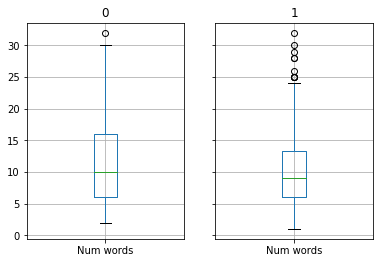

In [53]:
reviews.groupby('Liked').boxplot(column='Num words')